# Prediction using Supervised ML

**Bharath G**

**Task 1:-**
Predict the percentage of a student based on the no. of study hours

This is a simple linear regression task as it involves only 2 variables

# Step 1:- Import Libraries

In [68]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Step 2:- Import Data

In [5]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
regression = LinearRegression()

In [7]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.shape

(25, 2)

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
df.Hours.value_counts().index[1]

2.7

In [13]:
df.Scores.value_counts().index[1]

95

In [15]:
df.Scores = df.Scores.replace(np.nan, df.Scores.value_counts().index[1])
df.Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

# Step 3:- Plotting relationship between no. of hours studied and the scores obtained

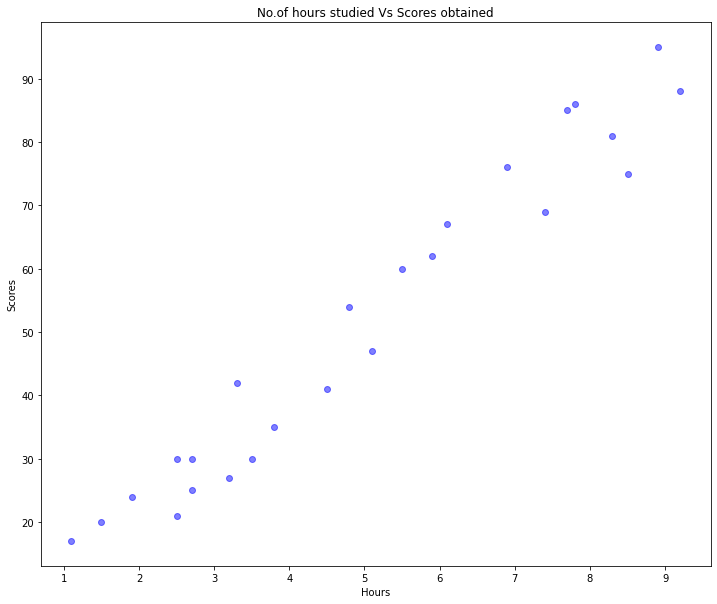

In [16]:
x = pd.DataFrame(data,columns=['Hours'])
y = pd.DataFrame(data,columns=['Scores'])
plt.figure(figsize=(12,10))
plt.scatter(x,y,alpha = 0.5,color = 'blue')
plt.title('No.of hours studied Vs Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Step 4:- Categorical Data to Continuos Data

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Scores = le.fit_transform(df.Scores)
df.Scores.values

array([ 2, 10,  5, 16,  6,  1, 21, 12, 18,  4, 19, 13,  8,  9,  0, 22,  6,
        3, 14, 15,  6, 11,  7, 17, 20], dtype=int64)

In [18]:
df.head(20)

,Hours,Scores
0,2.5,2
1,5.1,10
2,3.2,5
3,8.5,16
4,3.5,6
5,1.5,1
6,9.2,21
7,5.5,12
8,8.3,18
9,2.7,4


# Step 5:- Missing Values

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Hours'] = imp.fit_transform(df[['Hours']])
df['Scores'] = imp.fit_transform(df[['Scores']])
df.isnull().sum()
df.head(10)

,Hours,Scores
0,2.5,2.0
1,5.1,10.0
2,3.2,5.0
3,8.5,16.0
4,3.5,6.0
5,1.5,1.0
6,9.2,21.0
7,5.5,12.0
8,8.3,18.0
9,2.7,4.0


# Step 6 :- Feature and Target

In [77]:
fm = df.iloc[:,:-1]
tv = df.Scores

print(fm.shape)
print(tv.shape)

(25, 1)
(25,)


In [80]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [21]:
from sklearn.model_selection import train_test_split
?train_test_split()

Object `train_test_split()` not found.


# Step 7:- Train and Test sets ---> data splitting (80:20)

In [22]:
from sklearn.model_selection import train_test_split
fm_train, fm_test, tv_train, tv_test = train_test_split(fm,tv, test_size=0.2)
print(fm_train.shape)
print(fm_test.shape)
print(tv_train.shape)
print(tv_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Step 8 :- Build the Model

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=fm_train, y=tv_train)

print(model.coef_)
print(model.intercept_)

[2.58930952]
-2.3768994934684073


# Step 9:- Evaluation of Test & Train Datasets 

In [25]:
from sklearn.metrics import r2_score

r2_score(y_true = tv_train, y_pred = model.predict(X = fm_train))

0.9512498794647668

In [26]:
r2_score(y_true = tv_test, y_pred = model.predict(X = fm_test))

0.9342693724735052

In [27]:
fm_train.columns

Index(['Hours'], dtype='object')

In [32]:
for col in fm_train.columns:
  print(col)
  print("-"*10)
  model = LinearRegression()
  model.fit(X=fm_train[[col]], y = tv_train)
  print(r2_score(y_true = tv_train, y_pred = model.predict(X = fm_train[[col]])))
  print(r2_score(y_true = tv_test, y_pred = model.predict(X = fm_test[[col]])))
  print("")

Hours
----------
0.9512498794647668
0.9342693724735052



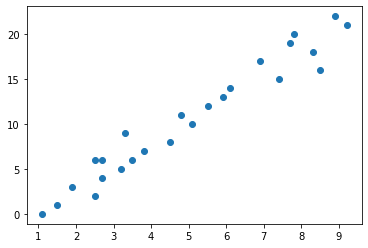

In [33]:
plt.scatter(x=df.Hours, y=df.Scores)

In [37]:
model = LinearRegression()
model.fit(X = fm_train[['Hours']], y = tv_train)

print(r2_score(y_true = tv_train, y_pred = model.predict(X = fm_train[['Hours']])))
print(r2_score(y_true = tv_test, y_pred = model.predict(X = fm_test[['Hours']])))

0.9512498794647668
0.9342693724735052


In [38]:
print(model.intercept_)
print(model.coef_)

-2.3768994934684073
[2.58930952]


In [40]:
for col in fm_train.columns :
    print(col)
    print("--" *10)
    for deg in np.arange(1, 4, 1) :
        print(deg)
        print("-" * 10)
        #print(fm_train[['Hours']] ** deg)
        model = LinearRegression()
        model.fit(X = fm_train[[col]] ** deg, y = tv_train)

        print("Train :", r2_score(y_true=tv_train, y_pred=model.predict(X = fm_train[[col]] ** deg)))
        print("Test :", r2_score(y_true=tv_test, y_pred=model.predict(X = fm_test[[col]] ** deg)))
        print("")


Hours
--------------------
1
----------
Train : 0.9512498794647668
Test : 0.9342693724735052

2
----------
Train : 0.8942661634902835
Test : 0.9398729505986851

3
----------
Train : 0.80571702964243
Test : 0.9294397501948244



In [43]:
fm_train['Hours2'] = fm_train['Hours'] ** 2
fm_test['Hours2'] = fm_test['Hours'] ** 2

<ipython-input-43-870f50889528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fm_train['Hours2'] = fm_train['Hours'] ** 2
<ipython-input-43-870f50889528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fm_test['Hours2'] = fm_test['Hours'] ** 2


In [44]:
fm_test.head(5)

,Hours,Hours2
19,7.4,54.76
24,7.8,60.84
4,3.5,12.25
20,2.7,7.29
8,8.3,68.89


In [46]:
fm_train_final = fm_train[['Hours', 'Hours2']]
fm_test_final = fm_test[['Hours', 'Hours2']]

In [47]:
model = LinearRegression()
model.fit(X = fm_train_final, y = tv_train)

print("Train :", r2_score(y_true=tv_train, y_pred=model.predict(X = fm_train_final)))
print("Test :", r2_score(y_true=tv_test, y_pred=model.predict(X = fm_test_final)))

Train : 0.9524029063723305
Test : 0.9331127246767951


# Step 10:- Predict the Test & Train datasets

In [48]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [86]:
clf.fit(fm_train,tv_train)

LinearRegression()

In [87]:
clf.predict(fm_test)

array([ 1.52832449,  5.9472679 , 16.86465752,  4.12770297, 12.9655898 ])

In [88]:
clf.score(fm_train,tv_train)

0.9490427595711809

In [89]:
clf.score(fm_test,tv_test)

0.9399994769060349

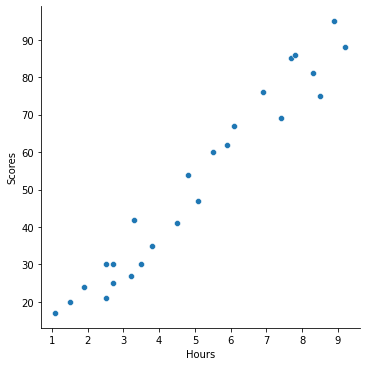

In [90]:
sns.relplot(x='Hours', y='Scores',data=data)

# Training the Algorithm

In [94]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


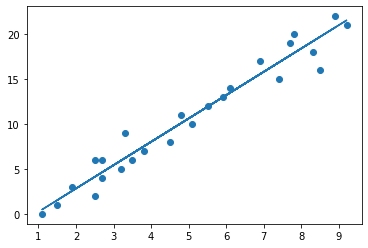

In [95]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Step 11:- Comparison between Actual & Predicted

In [96]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

**Testing with own data**

In [105]:
X = X.reshape(-1,1)

In [107]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [138]:

X = data.Hours.values.reshape(-1,1)
y = data.Scores.values.reshape(-1,1)

regression = LinearRegression()
regression.fit(X,y)
regression.predict([[9.25]])
print(regression.predict([[9.25]]))


[[92.90985477]]


# If a student studies for 9.25 hours he should score 92.9

**Evaluating the model**

In [140]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 1.049391428201475


In [143]:
print('Root Mean Square:', metrics.mean_squared_error(y_test,y_pred))

Root Mean Square: 1.6320142281558514
